# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [2]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

Download complete
Extracting data files...
Data extracted


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df  = pd.read_csv("data/airbnb_NYC.csv", encoding= "latin1")
df2 = pd.read_csv("data/mn_police_use_of_force.csv", encoding= "latin1")
df3 = pd.read_csv("data/metabric.csv", encoding= "latin1")


In [4]:
df['Price'].isna().sum()


np.int64(0)

In [5]:
df['Price'] = df['Price'].astype(str).str.replace('$', '')
df['Price'] = df['Price'].astype(str).str.replace(',', '')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [6]:
df2['subject_injury'].isna().sum()




np.int64(9848)

In [7]:
df2['subject_injury'] = df2['subject_injury'].fillna('Missing')
df2.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,Missing,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [8]:
cross_tab = pd.crosstab(df2['subject_injury'], df2['force_type'])
print(cross_tab)

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
Missing             2          7051               1421        0   
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
Missing                        27                 74           87   
No                             33                 34            0   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
Missing                              0                          170   
No                                   1                            0   
Yes                               

In [9]:
df3['Overall Survival Status'] = df3['Overall Survival Status'].replace(['1:DECEASED', '0:LIVING'], [0, 1])
df3.head()

/tmp/ipython-input-1479205072.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Overall Survival Status'] = df3['Overall Survival Status'].replace(['1:DECEASED', '0:LIVING'], [0, 1])


,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,1,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,0,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,1,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,0,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,0,YES,5.230071,31.0,4.0


In [10]:
df['Review Scores Rating'].isna().sum()

np.int64(8323)

In [11]:
df['Review Scores Rating'] = df['Review Scores Rating'].fillna(df['Review Scores Rating'].median())
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


1. There were 0 missing values for 'Price' column I didn't really have to do much with it just made sure in case if it was a string to just get rid of $ and , for those over 999
2. There were 9848 missing values. After cross tabulating, there were a lot missing data for some force types some with all missing because they were vague.
4. This median definitely negatively impacts the results because we don not know the real reviews for this data

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [12]:
from google.colab import files
uploaded = files.upload()

dfsharks = pd.read_excel('GSAF5.xls')
dfsharks.head()



Saving GSAF5.xls to GSAF5.xls


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dfsharks_cleaned = dfsharks.dropna(axis=1, how = 'all')
dfsharks_cleaned = dfsharks_cleaned.dropna(subset=['Year'])
dfsharks_cleaned = dfsharks_cleaned[dfsharks_cleaned['Year'] >= 1940]
dfsharks_cleaned

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,1940,1940.0,Unprovoked,NEW GUINEA,Bwagaoia,"Bagalina, North coast Misima Island",NaN,small girl,F,NaN,...,NaN,"A. Bleakley; A. M. Rapson, p.148",1940.00.00.e-small-girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.e,1940.00.00.e,1535.0,NaN,NaN
5535,1940,1940.0,Unprovoked,PAPUA NEW GUINEA,Western Papuan Gulf,Kerema,male,a native,NaN,NaN,...,NaN,"Papuan Villager, 11/1940",1940.00.00.d-Kerema.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.d,1940.00.00.d,1534.0,NaN,NaN
5536,1940,1940.0,Invalid,SOUTH AFRICA,Eastern Cape Province,Kidd's Beach,Swimming,NaN,NaN,NaN,...,Questionable incident,"D. Davies, p. 102",1940.00.00.c-KiddsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.c,1940.00.00.c,1533.0,NaN,NaN
5537,1940,1940.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Winkelspruit,NaN,Indian female,F,NaN,...,Questionable incident,"V.M. Coppleson (1958), p.247; SAF Case #161. U...",1940.00.00.b-IndianFemale.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.b,1940.00.00.b,1532.0,NaN,NaN


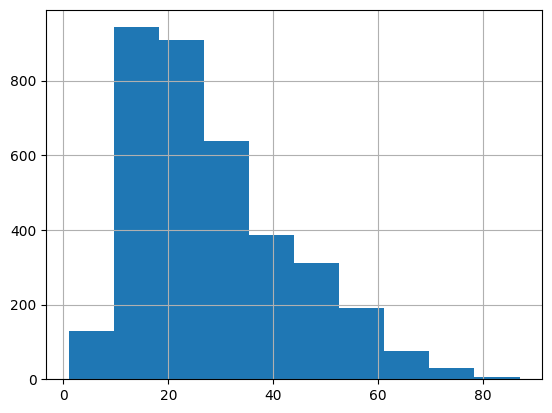

In [14]:
dfsharks_cleaned['Age'] = pd.to_numeric(dfsharks_cleaned['Age'], errors='coerce')
dfsharks_cleaned['Age'].hist()
plt.show()

In [15]:
dfsharks_cleaned["Type"] = dfsharks_cleaned["Type"].where(
    dfsharks_cleaned["Type"].isin(["Provoked", "Unprovoked"]),
    "Unknown"
)
proportions = dfsharks_cleaned['Type'].value_counts(normalize=True)
print(proportions)

Type
Unprovoked    0.744808
Unknown       0.161098
Provoked      0.094094
Name: proportion, dtype: float64


In [16]:
dfsharks_cleaned['Fatal Y/N'] = dfsharks_cleaned['Fatal Y/N'].where(
    dfsharks_cleaned['Fatal Y/N'].isin(['Y', 'N']),
    'Unknown'
)
cross_tab = pd.crosstab(dfsharks_cleaned['Fatal Y/N'], dfsharks_cleaned['Type'])
print(cross_tab)

Type       Provoked  Unknown  Unprovoked
Fatal Y/N                               
N               497      368        3372
Unknown          12      400          58
Y                12      124         694


1. It's a xls file so read_excel works
2. an observation is one basically row of data that has information and each observation forms the whole dataset. Each observation will influence decisions on how to clean the data based on the information they contain
3. The year data contained some very old data over 1000 was from before 1940 or unknown year status. Based off the data there is an increase in shark attacks. I believe a probable cause of this is more activities near water.
4. From cross tabulating Type with Fatality, it seems like unprovoked attacks are more fatal. This is probably due to people will be less likely to attack bigger sharks provoked.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about a framework on how to better clean data basically tidying it.
2. The tidy data standard is a way to set up data to be better used so you don't have a new setup everytime
3. The first sentence means that each messy dataset has a different issue, there is usually not a common problem/setup. The second sentence basically means that it is easy to see what variables and observations are but it is hard to give the actual definition of them.
4. Values are like ints and strings. Variables are basically all the values in the data. Observations are all values owned by a unit
5. Each variable forms a column. Each observation forms a row. Each type of observational unit forms a table.
6. Column headers are values not variables. Multiple variables stored in a column. variables stored in rows and columns. Multiple observational unit in one table. Single observational unit stored in multiple tables. The table is messy because income is not stated, just gives money amount is as multiple columns. Melting a datset means turning columns to rows.
7. In table 11 each day has their own column but table 12 melts it by having each day be a row.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

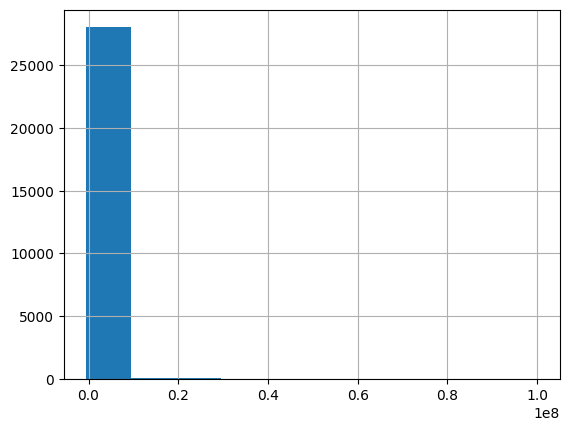

In [18]:
df_foreign = pd.read_csv("data/ForeignGifts_edu.csv", encoding= "latin1")
df_foreign['Foreign Gift Amount'] = pd.to_numeric(df_foreign['Foreign Gift Amount'], errors='coerce')
df_foreign['Foreign Gift Amount'].hist()
plt.show()

In [21]:
df_foreign['Gift Type'].value_counts()


,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [22]:
proportions = df_foreign['Gift Type'].value_counts(normalize=True)
print(proportions)

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


In [30]:
df_foreign.groupby('Country of Giftor')['ID'].count().sort_values(ascending=False).head(15)


,ID
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [31]:
df_foreign.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [33]:
df_foreign.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)


,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


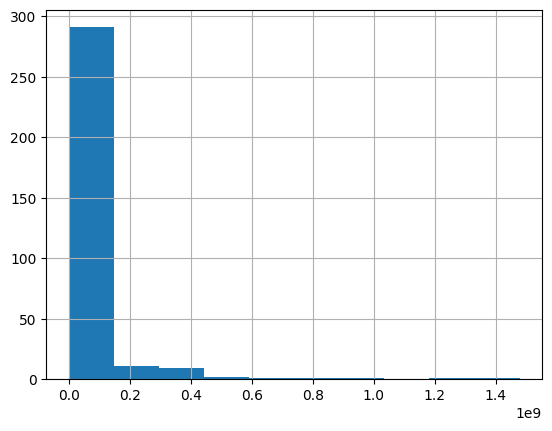

In [35]:
df_foreign.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).hist()
plt.show()


In [36]:
df_foreign.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


1. The Foreign Gift amount variable is the amount given from a single foreign gift amount donation. From the histogram most are about the same amount but there are outliers that donated a lot more money making the histogram skewed.
2. Proportions:
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
3. ENGLAND	3655
CHINA	2461
CANADA	2344
JAPAN	1896
SWITZERLAND	1676
SAUDI ARABIA	1610
FRANCE	1437
GERMANY	1394
HONG KONG	1080
SOUTH KOREA	811
QATAR	693
THE NETHERLANDS	512
KOREA	452
INDIA	434
TAIWAN	381
4. QATAR	2706240869
ENGLAND	1464906771
CHINA	1237952112
SAUDI ARABIA	1065205930
BERMUDA	899593972
CANADA	898160656
HONG KONG	887402529
JAPAN	655954776
SWITZERLAND	619899445
INDIA	539556490
GERMANY	442475605
UNITED ARAB EMIRATES	431396357
FRANCE	405839396
SINGAPORE	401157692
AUSTRALIA	248409202
5. Carnegie Mellon University	1477922504
Cornell University	1289937761
Harvard University	954803610
Massachusetts Institute of Technology	859071692
Yale University	613441311
Texas A&M University	521455050
Johns Hopkins University	502409595
Northwestern University	402316221
Georgetown University	379950511
University of Chicago (The)	364544338
University of Colorado Boulder	360173159
Duke University	343699498
Brigham Young University	323509863
Stanford University	319561362
University of Texas MD Anderson Cancer Center	301527419
6. The giftors that provided the most money is the qatar foundation

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [39]:
df_college = pd.read_csv("data/college_completion.csv", encoding= "latin1")
df_college

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,3793,461528,Grace College of Divinity,Fayetteville,North Carolina,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,43,81,NaN,NaN,12.0
3794,3794,462354,John Paul the Great Catholic University,Escondido,California,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,74,81,NaN,NaN,33.0
3795,3795,466921,Chamberlain College of Nursing-Missouri,St. Louis,Missouri,4-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20,81,NaN,NaN,8.0
3796,3796,474881,Minneapolis Media Institute,Edina,Minnesota,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,81,NaN,NaN,145.0


In [40]:

cross_tab = pd.crosstab(df_college['control'], df_college['level'])
print(cross_tab)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


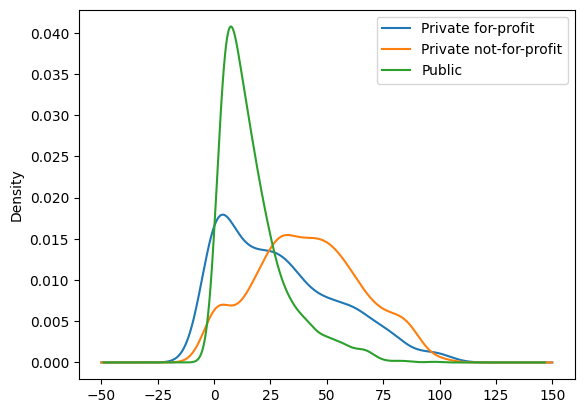

In [43]:
kernel_density = df_college['grad_100_value'].groupby(df_college['control']).plot(kind='kde')
plt.legend()
plt.show()

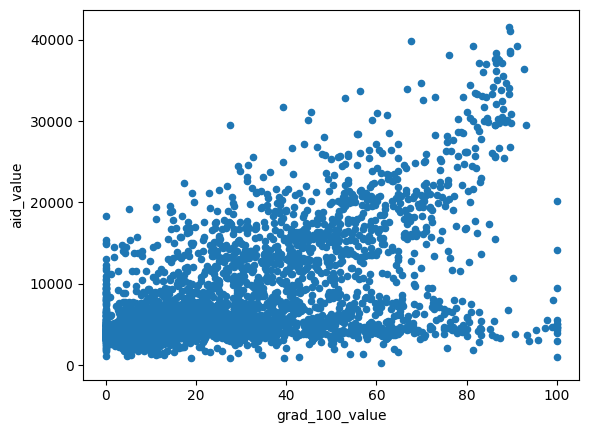

In [44]:
scatter_plot = df_college.plot.scatter(x='grad_100_value', y='aid_value')
plt.show()

In [46]:
covariance = df_college['grad_100_value'].cov(df_college['aid_value'])
print(covariance)

88610.48316902434


In [47]:
correlation = df_college['grad_100_value'].corr(df_college['aid_value'])
print(correlation)

0.5758792845936073


/tmp/ipython-input-232127038.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


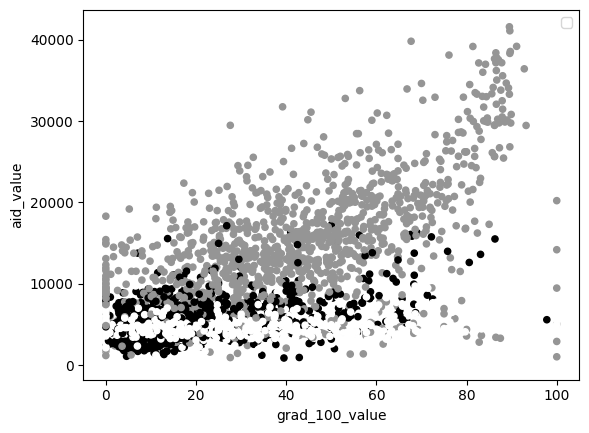

In [56]:
scatter_plot_updated = df_college.plot.scatter(x='grad_100_value', y='aid_value', color= pd.Categorical(df_college['control']).codes)
plt.legend()
plt.show()

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?